In [1]:

from new_utils import renew_model, renew_make_gradcam

# 필요사항 : 
user_images_folder = f"C:/Users/user/Desktop/assignment/image"
model_folder = f"C:/Users/user/Desktop/assignment/model" # tf_keras_vgg16_mura_model.h5
save_heatmap = f"./heatmap"

csv_location = f"./test.csv"
# 임의의 white image 
white_image_loc = f"C:/Users/user/Desktop/assignment/white.png"


c:\Users\user\.conda\envs\lavis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# # when model update, 1) renew model_location folder, 2) return model_location 
model_location = renew_model(model_folder) 

In [3]:
# 1) renew save_heatmap folder 
# 2) make gradcam & save heatmap in save_heatmap forlder
# 3) return data_df which record infomation about data_df

# converted 를 하는데 시간이 많이 걸리네. 

renew_make_gradcam(model_location, user_images_folder, save_heatmap, csv_location)


In [4]:
import pandas as pd 
dataframe = pd.read_csv(csv_location)


In [5]:
dataframe

,id,img_name,img_path,prediction,heatmap_path,image_caption,column_id
0,1,dog1.png,C:/Users/user/Desktop/assignment/image/convert...,3,./heatmap/dog1.png,a golden retriever is sitting in the grass,1
1,2,dog10.png,C:/Users/user/Desktop/assignment/image/convert...,1,./heatmap/dog10.png,a small white puppy running through the grass,1
2,3,dog2.png,C:/Users/user/Desktop/assignment/image/convert...,1,./heatmap/dog2.png,a close up of a dog with its tongue out,1
3,4,dog3.png,C:/Users/user/Desktop/assignment/image/convert...,1,./heatmap/dog3.png,a golden retriever sitting on a white background,1
4,5,dog4.png,C:/Users/user/Desktop/assignment/image/convert...,3,./heatmap/dog4.png,a couple of puppies laying on top of each other,1
5,6,dog5.png,C:/Users/user/Desktop/assignment/image/convert...,3,./heatmap/dog5.png,a close up of a dog sitting on a sidewalk,1
6,7,dog6.png,C:/Users/user/Desktop/assignment/image/convert...,1,./heatmap/dog6.png,a puppy is sitting on a white background,1
7,8,dog7.png,C:/Users/user/Desktop/assignment/image/convert...,1,./heatmap/dog7.png,a brown and white dog standing on top of a lus...,2
8,9,dog8.png,C:/Users/user/Desktop/assignment/image/convert...,1,./heatmap/dog8.png,a white dog on a leash being walked by a man,2
9,10,dog9.png,C:/Users/user/Desktop/assignment/image/convert...,1,./heatmap/dog9.png,a close up of a dog with a collar,2


'C:/Users/user/Desktop/assignment/image/hitgoram_/histogram_1.png'

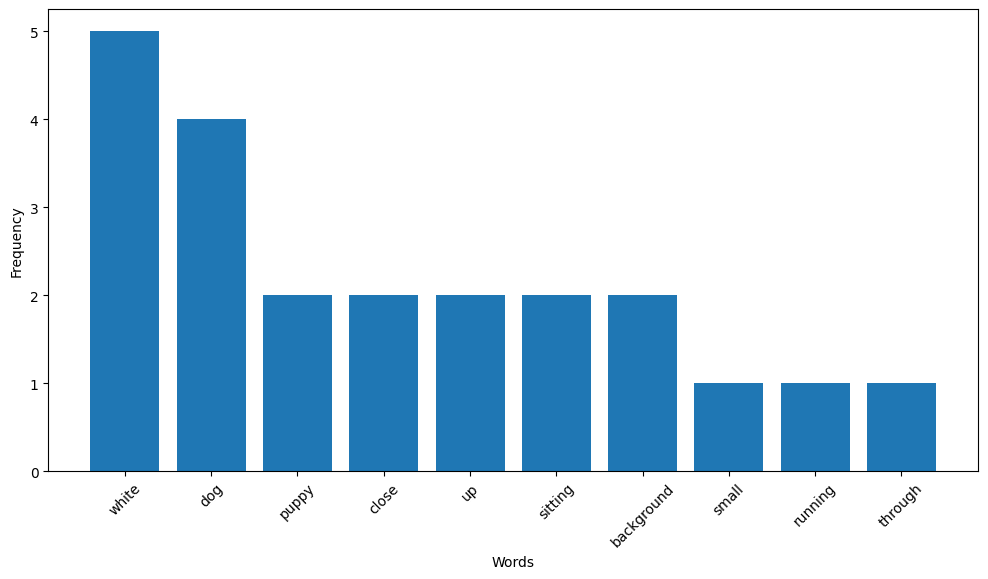

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd 
import os 
import shutil


# save_folder
def visual_histogram(class_id, csv_location, save_folder=None) : 
    if save_folder is not None : 
        if os.path.exists(save_folder): shutil.rmtree(save_folder)
        os.makedirs(save_folder)
        save_path = f"{save_folder}/histogram_{class_id}.png"

    dataframe = pd.read_csv(csv_location)
    filtered_df = dataframe[dataframe['prediction'] == class_id]
    if len(filtered_df) == 0 : 
        
        print("No data in this class")
        return 

    result_image_caption = filtered_df['image_caption'].tolist()

    # 무시할 단어 목록 (예: 관사, 조사) 설정하기 
    ignore_words = ["a", "an", "the", "of", "in", "on", "with", "and", "is"]

    all_words = ' '.join(result_image_caption).split()

    # 각 단어의 빈도를 계산하며 무시할 단어는 제외합니다.
    word_frequencies = Counter(word for word in all_words if word not in ignore_words)

    # 빈도 수가 상위 10개인 값만 가져오기 

    top_words = word_frequencies.most_common(10)

    words = [word for word, freq in top_words]
    frequencies = [freq for word, freq in top_words]

    # 히스토그램 생성
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

    if save_folder is None :
        plt.show()
    else :
        plt.savefig(save_path, bbox_inches='tight')
    
    return save_path


test_folder = os.path.join(user_images_folder, 'hitgoram_').replace('\\', '/')
visual_histogram(1, csv_location, test_folder)


In [16]:
max(dataframe['column_id'].tolist())

2